In [1]:
import cv2
import numpy as np
import glob
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
%matplotlib inline
import PIL
import math


In [2]:
tf. __version__

'2.0.0'

In [3]:
def cutWorkSpace(img,border): 
    # dimensioni immagini
    img_h = 2048
    img_l = 2048
    # offset per posizionamento su area d'indagine
    offset_x = 600
    offset_y = 500
    
    #taglio per garantire la ricerca sull'area di interesse, evitando rumori dati dallo sfondo
    crop_img = img[offset_y:img_h-offset_y, offset_x:img_l-offset_x]
    
    # Convert the img to grayscale
    gray = cv2.cvtColor(crop_img,cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (9, 9), 0)
    high_thresh, thresh_im = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    #cv2.imwrite('provaT.jpg', thresh_im)
    lowThresh = 0.5*high_thresh
    
    
    # Apply edge detection method on the image
    #edges = cv2.Canny(blurred,20,150,apertureSize = 3)
    edges = cv2.Canny(blurred,20,150,apertureSize = 3)
    cv2.imwrite('canny.jpg', edges)
    # This returns an array of r and theta values
    lines = cv2.HoughLines(edges,1,np.pi/180, 100)
    #cv2.imwrite('Risultati/resFS'+name+'c.jpg', edges)
    # The below for loop runs till r and theta values 
    # are in the range of the 2d array
    i = 0
    x_first = 0
    x_second = 0
    count = 0
    delta = 30

    while count < 2:
        for r,theta in lines[i]:
            # Stores the value of cos(theta) in a
            a = np.cos(theta)

            # Stores the value of sin(theta) in b
            b = np.sin(theta)

            # x0 stores the value rcos(theta)
            x0 = a*r

            # y0 stores the value rsin(theta)
            y0 = b*r

            #ti define line lenght
            const = 3000
            # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
            x1 = int(x0 + const*(-b))

            # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
            y1 = int(y0 + const*(a))

            # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
            x2 = int(x0 - const*(-b))

            # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
            y2 = int(y0 - const*(a))

            if count == 0 :
                
                x_first = x0
                #cv2.line(img,(x1+offset_x,y1+offset_y), (x2+offset_x,y2+offset_y), (0,0,255),2)
                count += 1
            else:
                if abs(x_first-x0) > delta :
                    x_second = x0
                    #cv2.line(img,(x1+offset_x,y1+offset_y), (x2+offset_x,y2+offset_y), (0,0,255),2)
                    count += 1
            i += 1
    # All the changes made in the input image are finally
    # written on a new image houghlines.jpg
    #cv2.imwrite('Risultati/res'+name+'.jpg', img)
    
    if x_first < x_second:
        temp = img[0:img_h-1, int(offset_x+x_first-border):int(offset_x+x_second+border)]
        #blurred = cv2.GaussianBlur(temp, (3,3), 0)
        return  cv2.cvtColor(temp,cv2.COLOR_BGR2GRAY)
    else:
        temp = img[0:img_h-1, int(offset_x+x_second-border):int(offset_x+x_first+border)]
        #blurred = cv2.GaussianBlur(temp, (3,3), 0)
        return  cv2.cvtColor(temp,cv2.COLOR_BGR2GRAY)

In [4]:
def cutWorkSpace2(img,border): 
    # dimensioni immagini
    img_h = 2048
    img_l = 2048
    # offset per posizionamento su area d'indagine
    offset_x = 600
    offset_y = 500
    
    #taglio per garantire la ricerca sull'area di interesse, evitando rumori dati dallo sfondo
    crop_img = img[offset_y:img_h-offset_y, offset_x:img_l-offset_x]
    
    # Convert the img to grayscale
    gray = cv2.cvtColor(crop_img,cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (9, 9), 0)
    high_thresh, thresh_im = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    #cv2.imwrite('provaT.jpg', thresh_im)
    lowThresh = 0.5*high_thresh
    
    
    # Apply edge detection method on the image
    #edges = cv2.Canny(blurred,20,150,apertureSize = 3)
    edges = cv2.Canny(blurred,20,150,apertureSize = 3)
    cv2.imwrite('canny.jpg', edges)
    # This returns an array of r and theta values
    lines = cv2.HoughLines(edges,1,np.pi/180, 100)
    #cv2.imwrite('Risultati/resFS'+name+'c.jpg', edges)
    # The below for loop runs till r and theta values 
    # are in the range of the 2d array
    i = 0
    x_first = 0
    x_second = 0
    count = 0
    delta = 30
    thetaFinal = 0
    while count < 2:
        for r,theta in lines[i]:
            # Stores the value of cos(theta) in a
            a = np.cos(theta)

            # Stores the value of sin(theta) in b
            b = np.sin(theta)

            # x0 stores the value rcos(theta)
            x0 = a*r

            # y0 stores the value rsin(theta)
            y0 = b*r

            #ti define line lenght
            const = 3000
            # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
            x1 = int(x0 + const*(-b))

            # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
            y1 = int(y0 + const*(a))

            # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
            x2 = int(x0 - const*(-b))

            # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
            y2 = int(y0 - const*(a))

            if count == 0 :
                if theta != 0:
                    thetaFinal = 180-math.degrees(theta)
                x_first = x0
                #cv2.line(img,(x1+offset_x,y1+offset_y), (x2+offset_x,y2+offset_y), (0,0,255),2)
                count += 1
            else:
                if abs(x_first-x0) > delta :
                    x_second = x0
                    #cv2.line(img,(x1+offset_x,y1+offset_y), (x2+offset_x,y2+offset_y), (0,0,255),2)
                    count += 1
            i += 1
    # All the changes made in the input image are finally
    # written on a new image houghlines.jpg
    #cv2.imwrite('Risultati/res'+name+'.jpg', img)
    (h, w) = img.shape[:2]
    (cX, cY) = (w // 2, h // 2)
    # rotate our image by Theta degrees around the center of the image
    M = cv2.getRotationMatrix2D((cX, cY), -thetaFinal, 1.0)
    rotated = cv2.warpAffine(img, M, (w, h))
    print(thetaFinal)
    #cv2.imshow("Rotated by 45 Degrees", rotated)
    
    if x_first < x_second:
        temp = rotated[0:img_h-1, int(offset_x+x_first-border):int(offset_x+x_second+border)]
        
        #blurred = cv2.GaussianBlur(temp, (3,3), 0)
        return  cv2.cvtColor(temp,cv2.COLOR_BGR2GRAY)
    else:
        temp = rotated[0:img_h-1, int(offset_x+x_second-border):int(offset_x+x_first+border)]
        #blurred = cv2.GaussianBlur(temp, (3,3), 0)
        return  cv2.cvtColor(temp,cv2.COLOR_BGR2GRAY)

In [5]:
def divideImage(img,pcs):
    results = []
    lung = len(img) // pcs
    for i in range(pcs):
        results.append(img[(lung*i):(lung*(i+1)-1)][:])
    return results

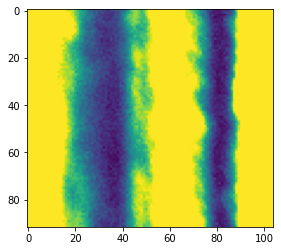

In [6]:
pathBuoni = '/Users/leonardoaggio/Desktop/Dataset/S606C/Buoni/*.tif'
#pathBuoni = '/Users/leonardoaggio/Desktop/Dataset/S606C/Cam3@00004/*.tif'
pathFS = '/Users/leonardoaggio/Desktop/Dataset/S606C/FalsiScarti/*.tif'
#pathScarti = '/Users/leonardoaggio/Desktop/Dataset/S606C/Scarti/*.tif'
pathBuoniVal = '/Users/leonardoaggio/Desktop/Dataset/S606C/BuoniVal/*.tif'
#pathBuoni = '/Users/leonardoaggio/Desktop/Dataset/S606C/Cam3@00004/*.tif'
pathFSVal = '/Users/leonardoaggio/Desktop/Dataset/S606C/FalsiScartiVal/*.tif'
pathScartiVal = '/Users/leonardoaggio/Desktop/Dataset/S606C/ScartiVal/*.tif'

pezziXimmagine = 22
border = 30
#Nclusters = 10

#results = []
img_train = []
img_test = []


list_paths = []



list_paths = glob.glob(pathBuoni)
list_paths += glob.glob(pathFS) 
#list_paths += glob.glob(pathScarti) 

count = 0
for img_path in list_paths:
    img = cv2.imread(img_path)
    #try:
    img_train +=  divideImage(cutWorkSpace(img,border),pezziXimmagine)
    count += 1
    #except:
        #print('errore lettura')


list_paths = glob.glob(pathBuoniVal)
list_paths += glob.glob(pathFSVal) 
#list_paths += glob.glob(pathScartiVal) 

count = 0
for img_path in list_paths:
    img = cv2.imread(img_path)
    try:
        img_test +=  divideImage(cutWorkSpace(img,border),pezziXimmagine)
        count += 1
    except:
        print('errore lettura')



#####
# ORA HO IMG_RESULTS & RESULTS
plt.imshow(img_test[100])
plt.show()

In [7]:
square1 = 88
square2 = 88



x_train = np.empty((len(img_train), square1,square2,1))
x_train = x_train.astype('float32')
count = 0

for img in img_train:
    start1 = int((len(img) / 2) - (square1 / 2))
    start2 = int((len(img[0]) / 2) - (square2 / 2))


    if len(img) >= square1:
        img = img[start1:start1+square1, start2:start2+square2]
        img = img/ 255.
        x_train[count]=(np.expand_dims(img, axis=2))
        count += 1
    
count = 0

x_test = np.empty((len(img_test), square1,square2,1))
x_test = x_test.astype('float32')

for img in img_test:
    start1 = int((len(img) / 2) - (square1 / 2))
    start2 = int((len(img[0]) / 2) - (square2 / 2))
    if len(img) >= square1:
        img = img[start1:start1+square1, start2:start2+square2]
        img = img/ 255.
        x_test[count]=(np.expand_dims(img, axis=2))
        count += 1

   

In [13]:
x_test[0][0][0]

array([1.], dtype=float32)

In [7]:
#pass the gray scale input image of size(28,28,1)
inputs = tf.keras.Input(shape=(square1, square2, 1), name='input_layer')
# Conv Block 1 -> BatchNorm->leaky Relu
encoded = tf.keras.layers.Conv2D(32, kernel_size=3, strides= 1, padding='same', name='conv_1')(inputs)
encoded = tf.keras.layers.BatchNormalization(name='batchnorm_1')(encoded)
encoded = tf.keras.layers.LeakyReLU(name='leaky_relu_1')(encoded)
# Conv Block 2 -> BatchNorm->leaky Relu
encoded = tf.keras.layers.Conv2D(64, kernel_size=3, strides= 2, padding='same', name='conv_2')(encoded)
encoded = tf.keras.layers.BatchNormalization(name='batchnorm_2')(encoded)
encoded = tf.keras.layers.LeakyReLU(name='leaky_relu_2')(encoded)
# Conv Block 3 -> BatchNorm->leaky Relu
encoded = tf.keras.layers.Conv2D(64, kernel_size=3, strides=2, padding='same', name='conv_3')(encoded)
encoded = tf.keras.layers.BatchNormalization(name='batchnorm_3')(encoded)
encoded = tf.keras.layers.LeakyReLU(name='leaky_relu_3')(encoded)
#Decoder
# DeConv Block 1-> BatchNorm->leaky Relu
decoded = tf.keras.layers.Conv2DTranspose(64, 3, strides= 1, padding='same',name='conv_transpose_1')(encoded)
decoded = tf.keras.layers.BatchNormalization(name='batchnorm_4')(decoded)
decoded = tf.keras.layers.LeakyReLU(name='leaky_relu_4')(decoded)
# DeConv Block 2-> BatchNorm->leaky Relu
decoded = tf.keras.layers.Conv2DTranspose(64, 3, strides= 2, padding='same', name='conv_transpose_2')(decoded)
decoded = tf.keras.layers.BatchNormalization(name='batchnorm_5')(decoded)
decoded = tf.keras.layers.LeakyReLU(name='leaky_relu_5')(decoded)
# DeConv Block 3-> BatchNorm->leaky Relu
decoded = tf.keras.layers.Conv2DTranspose(32, 3, 2, padding='same', name='conv_transpose_3')(decoded)
decoded = tf.keras.layers.BatchNormalization(name='batchnorm_6')(decoded)
decoded = tf.keras.layers.LeakyReLU(name='leaky_relu_6')(decoded)
# output
outputs = tf.keras.layers.Conv2DTranspose(1, 3, 1,padding='same', activation='sigmoid', name='conv_transpose_4')(decoded)


2021-11-08 08:56:38.395525: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-08 08:56:38.397348: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [8]:
def SSIMLoss(y_true, y_pred):

    y_true = tf.convert_to_tensor(y_true)
    y_pred = tf.convert_to_tensor(y_pred)

    return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred,1.0))




In [10]:
autoencoder = tf.keras.Model(inputs, outputs)
optimizer = tf.keras.optimizers.Adam(lr = 0.0005)
autoencoder.compile(optimizer=optimizer, loss=SSIMLoss)


In [11]:
hist=autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test)
                )


Train on 3784 samples, validate on 946 samples
Epoch 1/30
3784/3784 [==============================] - 90s 24ms/sample - loss: 0.3808 - val_loss: 0.5147
Epoch 2/30
3784/3784 [==============================] - 84s 22ms/sample - loss: 0.1300 - val_loss: 0.4988
Epoch 3/30
3784/3784 [==============================] - 81s 21ms/sample - loss: 0.0970 - val_loss: 0.4862
Epoch 4/30
3784/3784 [==============================] - 84s 22ms/sample - loss: 0.0806 - val_loss: 0.4778
Epoch 5/30
3784/3784 [==============================] - 82s 22ms/sample - loss: 0.0692 - val_loss: 0.4685
Epoch 6/30
3784/3784 [==============================] - 83s 22ms/sample - loss: 0.0600 - val_loss: 0.4545
Epoch 7/30
3784/3784 [==============================] - 80s 21ms/sample - loss: 0.0528 - val_loss: 0.4343
Epoch 8/30
3784/3784 [==============================] - 81s 21ms/sample - loss: 0.0469 - val_loss: 0.4116
Epoch 9/30
3784/3784 [==============================] - 82s 22ms/sample - loss: 0.0428 - val_loss: 0.3844

In [12]:
autoencoder.save('autoencoderTest')

2021-11-08 09:40:15.166760: W tensorflow/python/util/util.cc:299] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: autoencoder30/assets


In [13]:
autoencoder_copy = tf.keras.models.load_model('autoencoder30', compile=False)
autoencoder_copy.compile(optimizer=optimizer, loss=SSIMLoss)

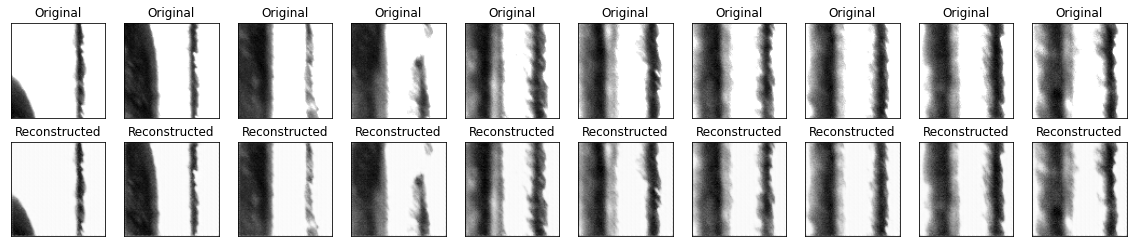

In [14]:
decoded_imgs = autoencoder_copy.predict(x_train)
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_train[i].reshape(square1, square2))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    plt.title("Original")
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.title("Reconstructed")
    plt.imshow(decoded_imgs[i].reshape(square1, square2))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [15]:
decoded_imgs = autoencoder_copy.predict(x_test)

In [16]:
values1 = []

for i in range(len(x_test)):
    value_a = SSIMLoss(x_test[i],decoded_imgs[i])
    values1.append(value_a.numpy())

0


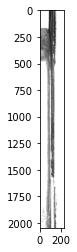

In [99]:
path = '/Users/leonardoaggio/Desktop/Dataset/S606C/ScartiVal/*.tif'
#path = 'Desktop/Dataset/S606C/ScartiTotali/' 
pezziXimmagine = 22
border = 100
#Nclusters = 10

#results = []
imgs = []


list_paths = []

list_paths += glob.glob(path) 
count = 0
for img_path in list_paths:
    img = cv2.imread(img_path)
    try:
        temp = cutWorkSpace2(img,border)
        imgs +=  divideImage(temp,pezziXimmagine)
        plt.imshow(temp)
        plt.show()
        count += 1
    except:
        print('errore lettura')



x_test_final = np.empty((len(imgs), square1,square2,1))
x_test_final = x_test_final.astype('float32')
count = 0

for img in imgs:
    start1 = int((len(img) / 2) - (square1 / 2))
    start2 = int((len(img[0]) / 2) - (square2 / 2))
    if len(img) >= square1:
        img = img[start1:start1+square1, start2:start2+square2]
        img = img/ 255.
        x_test_final[count]=(np.expand_dims(img, axis=2))
        count += 1

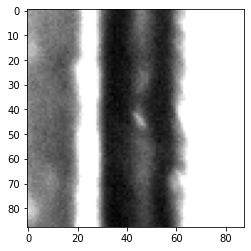

In [100]:
plt.imshow(x_test_final[8])
plt.show()

In [101]:
decoded_imgs_final = autoencoder_copy.predict(x_test_final)

In [102]:
values2 = []

for i in range(len(x_test_final)):
    print(str(i)+ ' su '+ str(len(x_test_final)))
    value_a = SSIMLoss(x_test_final[i],decoded_imgs_final[i])
    values2.append(value_a.numpy())

0 su 22
1 su 22
2 su 22
3 su 22
4 su 22
5 su 22
6 su 22
7 su 22
8 su 22
9 su 22
10 su 22
11 su 22
12 su 22
13 su 22
14 su 22
15 su 22
16 su 22
17 su 22
18 su 22
19 su 22
20 su 22
21 su 22


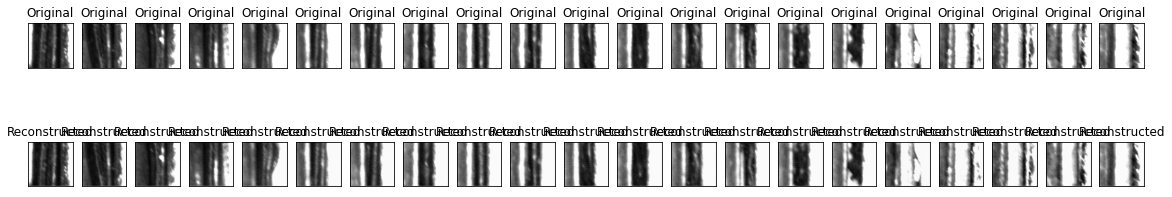

In [103]:
#decoded_imgs = autoencoder_copy.predict(x_test_final)
n = 21
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_final[i].reshape(square1, square2))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    plt.title("Original")
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.title("Reconstructed")
    plt.imshow(decoded_imgs_final[i].reshape(square1, square2))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [104]:
values2

[0.021120012,
 0.019674122,
 0.022420645,
 0.02353412,
 0.019925296,
 0.0153231025,
 0.012484968,
 0.013438344,
 0.013943195,
 0.011568904,
 0.011601746,
 0.015172005,
 0.016131282,
 0.013165355,
 0.014676869,
 0.015212178,
 0.016489506,
 0.021355331,
 0.020556927,
 0.019358993,
 0.016344726,
 0.016349375]

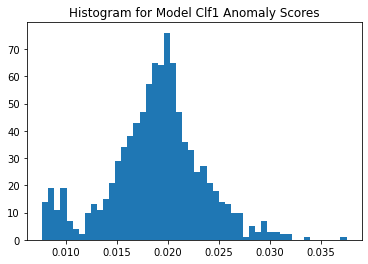

0.03755021


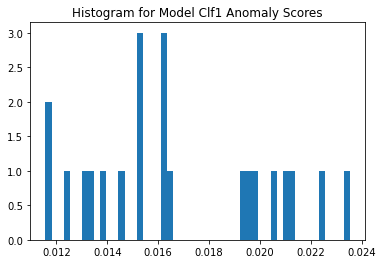

0.02353412


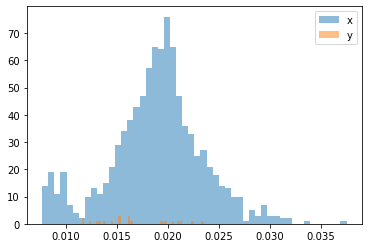

In [105]:
plt.hist(values1, bins=50)  # arguments are passed to np.histogram
plt.title("Histogram for Model Clf1 Anomaly Scores")
plt.show()

print(np.max(values1))

plt.hist(values2, bins=50)  # arguments are passed to np.histogram
plt.title("Histogram for Model Clf1 Anomaly Scores")
plt.show()

print(np.max(values2))

x = values1
y = values2


plt.hist(x, bins=50, alpha=0.5, label='x')
plt.hist(y, bins=50, alpha=0.5, label='y')
plt.legend(loc='upper right')
plt.show()

